# <div class="alert alert-block alert-info">BUILD DEEP FEED FORWARD MODEL</div>

![Keras](https://miro.medium.com/max/500/1*LBjjmGofNJ_6vetddYAvIQ.jpeg)

----

## Tools

**Numpy** adalah library yang akan kita gunakan untuk memanipulasi array n-dimensi.

**Tensorflow** merupakan library yang diciptakan oleh Google Brain, yang akan menjadi library inti kita dalam membangun dan men-*serve* model ANN dalam mengenal tulisan tangan. Namun, karena Tensorflow terlalu rumit dan *verbose* untuk pemula, kita akan menggunakan **Keras**. Tensorflow sangat populer karena selain dukungan memiliki *state-of-the-art* fitur pengembangan model Deep Learning, Tensorflow juga menawarkan kemudahan untuk men-deploy model Deep Learning yang telah dibuat ke berbagai jenis platform seperti Cloud, Android, iOS, Raspberry Pi, dsb.

Keras merupakan library *wrapper* dari Tensorflow. Dengan Keras, kita tetap dapat menggunakan Tensorflow dengan code yang lebih mudah dan ringkas.

![TF](https://github.com/Amin-Tgz/awesome-tensorflow-2/raw/master/imgs/TF.png)

----

## Data : MNIST

**MNIST** (Modified National Institute of Standards and Technology) merupakan dataset angka dari tulisan tangan yang dibuat oleh Yann LeCun dari NYU http://yann.lecun.com/exdb/mnist/. Yann LeCun merupakan salah satu dari tiga tokoh penerima Turing Award (bisa dikatakan Noble Prize untuk bidang computing) berkat jasanya di bidang AI.

![lecun](https://cdn.vox-cdn.com/uploads/chorus_image/image/63307717/verge_180326_3322_0001.0.jpg)

dari kiri ke kanan : Yann LeCun, Geoffrey Hinton, Yoshua Bengio ***'The Godfathers of AI'***

MNIST memiliki 60.000 data training dan 10.000 data testing. Dalam MNIST terdapat tulisan tangan berupa angka dari 0 hingga 9 (10 label/kelas). Dataset asli MNIST dapat didownload di : http://yann.lecun.com/exdb/mnist/. Keras telah menyediakan dataset ini dalam librarynya.

### Import data MNIST dari Keras

In [1]:
# import numpy untuk pengolahan matriks
import numpy as np
# import modul mnist dari keras.datasets
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# load data mnist ke empat variabel.
# citra angka untuk training dan labelnya di x_train dan y_train.
# citra angka untuk testing dan labelnya di x_test dan y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Untuk memvisualisasikan data x_train dan x_test kita memerlukan modul pyplot dari library **Matplotlib**.

In [3]:
# import matplotlib untuk visualisasi citra mnist
import matplotlib.pyplot as plt

**Lihat data pertama dari x_train**

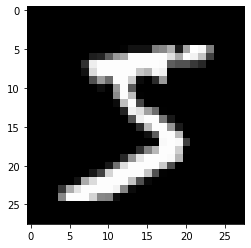

In [4]:
# visualisasi data pertama dari x_train, 0 menyatakan index data
plt.imshow(x_train[0,:,:], cmap='gray')

**Lihat label dari data pertama tersebut**

In [5]:
# cek label data di atas
y_train[0]

5

Sesuai dengan gambar dan labelnya, data pertama (index ke-0) dari x_train adalah angka 5.

-----

## Build Model

### Preprocess data

Untuk dapat memasukkan data ke arsitektur Deep Learning yang akan kita buat, kita perlu mengolah data input (yang berupa matriks citra angka MNIST) terlebih dahulu. Pengolahan di sini meliputi perubahan bentuk (shape) dari matriks gambar, normalisasi data dan encoding label data. Pengolahan bentuk matriks gambar sangat bergantung pada arsitektur Deep Learning yang Anda buat. Pada kali ini kita akan menggunakan arsitektur Deep Feed Forward seperti gambar di bawah ini. Terdiri dari 1 layer input, 2 *hidden layer* dan 1 layer ouput.

![TF](https://polychord.io/neuralnetchart/img/DFF.png)

*perhatian : jumlah node pada tiap layer pada gambar di atas tidak mencerminkan arsitektur yang ingin kita bangun. layer input terdiri dari 784 node, hidden layer pertama terdiri dari 128 node, hidden layer kedua terdiri dari 32 node dan layer output terdiri dari 10 node*

Untuk merubah bentuk matriks Perubahan bentuk dapat dicontohkan dengan matriks di bawah ini. Misalkan Anda memiliki image berukuran 3x3 piksel seperti gambar di bawah ini. Untuk dapat memasukkan data ke arsitektur di atas, kita perlu mengubah matriks 3x3 tadi menjadi matriks dengan ukuran 1x9.

3x3 matriks

$$\begin{bmatrix}
1 & 2 & 3\\ 
 4& 5 &6 \\ 
 7& 8 & 9
\end{bmatrix}$$

1x9 matriks

$$\begin{bmatrix}
1 & 2 & 3 &
 4& 5 &6 & 
 7& 8 & 9
\end{bmatrix}$$

In [6]:
# ubah bentuk matriks ke n x 784. dimana n adalah jumlah citra
reshaped_x_train = x_train.reshape(-1,784).astype(np.float32)
reshaped_x_test = x_test.reshape(-1,784).astype(np.float32)

In [7]:
# normalisasi nilai piksel. citra yang nilainya 0-255 dibuah menjadi 0-1
reshaped_x_train /= 255
reshaped_x_test /= 255

In [8]:
# import modul untuk encoding label dari keras.utils
from keras.utils import to_categorical

In [9]:
# buat variabel untuk menampung jumlah kelas
n_class = 10
# encoding label dari citra training dan testing
reshaped_y_train = to_categorical(y_train, n_class)
reshaped_y_test = to_categorical(y_test, n_class)

In [10]:
# import modul yang dibutuhkan untuk membangun arsitektur
from keras.models import Sequential
from keras.layers import Dense

### Buat arsitektur model

In [11]:
# buat arsitektur
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_class, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train model

In [12]:
# training model
model.fit(reshaped_x_train, reshaped_y_train, validation_data=(reshaped_x_test, reshaped_y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.2247 - accuracy: 0.9334 - val_loss: 0.1325 - val_accuracy: 0.9595
Epoch 2/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0951 - accuracy: 0.9705 - val_loss: 0.0829 - val_accuracy: 0.9743
Epoch 3/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0923 - val_accuracy: 0.9708
Epoch 4/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0836 - val_accuracy: 0.9762
Epoch 5/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0749 - val_accuracy: 0.9786
Epoch 6/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0838 - val_accuracy: 0.9784
Epoch 7/10
60000/60000 [==============================] 

### Save Model

In [13]:
# simpan model ke dalam bentuk file HDF5 untuk bisa dideploy
model.save('model.h5')

**SELAMAT! Anda telah berhasil membuat model Deep Learning pertama Anda!**

----

## Prediksi Angka dari Gambar dengan Model yang Telah Kita Buat

In [14]:
# import modul load_model untuk men-load model yang telah kita simpan
from keras.models import load_model

In [15]:
# load model yang telah kita buat (model.h5) ke variabel model
model = load_model('model.h5')

In [16]:
# tentukan indek x_test yang akan diambil. tampung ke variabel idx. kita akan coba mengambil data index ke-100 dari x_test
idx = 100
# ambil data pertama dari x_test. tampung ke variabel img
img = x_test[idx,:,:]

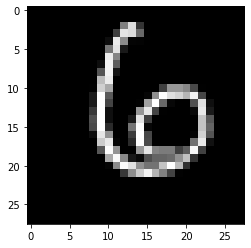

In [17]:
# visualisasi data img
plt.imshow(img, cmap='gray')

In [18]:
# ambil label data pertama. tampung ke variabel label
y = y_test[idx]

In [19]:
# lihat label data tersebut
print(y)

6


In [20]:
# reshape img agar bisa masuk ke model
img_reshaped = img.reshape(1,-1).astype(np.float32)
# normalisasi data
img_reshaped /= 255

In [21]:
# prediksi kelas/label dari data tadi
model.predict_classes(img_reshaped)

array([6], dtype=int64)

Model kita telah memprediksikan angka dengan tepat!. Dengan arsitektur yang sederhana tadi, kita telah mampu membuat model yang cukup robust. Bayangkan jika Anda menggunakan arsitektur yang lebih kompleks dan lengkap. Disinilah kelebihan dari Deep Learning.

**Tambahan**

Lihat 3 probabilitas tertinggi dari hasil prediksi

In [22]:
model.predict(img_reshaped)

array([[2.1437611e-08, 1.1861666e-08, 4.0217796e-10, 3.3490102e-10,
        8.2706129e-07, 8.1228512e-07, 9.9999833e-01, 9.1732910e-10,
        5.3158646e-09, 6.3853822e-12]], dtype=float32)

In [23]:
pred = model.predict_proba(img_reshaped)
pred = pred.reshape(-1)
idx_pred = pred.argsort()[::-1][:3]
for i in idx_pred:
    print('Diprediksi sebagai angka {} dengan proabilitas :{}'.format(i,pred[i]))

Diprediksi sebagai angka 6 dengan proabilitas :0.9999983310699463
Diprediksi sebagai angka 4 dengan proabilitas :8.270612852356862e-07
Diprediksi sebagai angka 5 dengan proabilitas :8.122851227199135e-07
